## Rain in Australia Mini Project 2

Context
Predicting next-day rain by training classification models on the target variable RainTomorrow.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('weatherAUS.csv')

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.shape

(145460, 23)

In [6]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,145460,3436,2013-11-12,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,145460,49,Canberra,3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,143975.0,NaN,NaN,NaN,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,NaN,NaN,NaN,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,NaN,NaN,NaN,2.360918,8.47806,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,NaN,NaN,NaN,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,NaN,NaN,NaN,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustDir,135134,16,W,9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,135197.0,NaN,NaN,NaN,40.03523,13.607062,6.0,31.0,39.0,48.0,135.0
WindDir9am,134894,16,N,11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [9]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [10]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [12]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [13]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [14]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [15]:
df['Location'].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

# Fixing missing values

First of all I'm going to drop all rows where the target variable 'RainTomorrow' is null.

In [16]:
df.dropna(subset=['RainTomorrow'], inplace=True)

In [17]:
df['RainTomorrow'].isnull().sum()

0

In [18]:
#Dropping unneeded columns

#All columns look like they could be useful, so I will not drop any values for now. I will reserve judgement until I've looked at the correlation info.

I will now fill null values. 

For categorical data I will fill with the mode.

For numerical data, I will fill with the median (to minimise the impact of outliers changing the mean)

In [19]:
#Categorical fill
df['Location'].fillna(df['Location'].mode(), inplace=True)
df['WindGustDir'].fillna(df['WindGustDir'].mode(), inplace=True)
df['WindDir9am'].fillna(df['WindDir9am'].mode(), inplace=True)
df['WindDir3pm'].fillna(df['WindDir3pm'].mode(), inplace=True)
df['RainToday'].fillna(df['RainToday'].mode(), inplace=True)
df['RainTomorrow'].fillna(df['RainTomorrow'].mode(), inplace=True)

In [20]:
df['MinTemp'].fillna(df['MinTemp'].median(), inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].median(), inplace=True)
df['Rainfall'].fillna(df['Rainfall'].median(), inplace=True)
df['Evaporation'].fillna(df['Evaporation'].median(), inplace=True)
df['Sunshine'].fillna(df['Sunshine'].median(), inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].median(), inplace=True)
df['WindSpeed9am'].fillna(df['WindSpeed9am'].median(), inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].median(), inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].median(), inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].median(), inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].median(), inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].median(), inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].median(), inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].median(), inplace=True)
df['Temp9am'].fillna(df['Temp9am'].median(), inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].median(), inplace=True)


In [21]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9330
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [22]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


## Checking Outliers

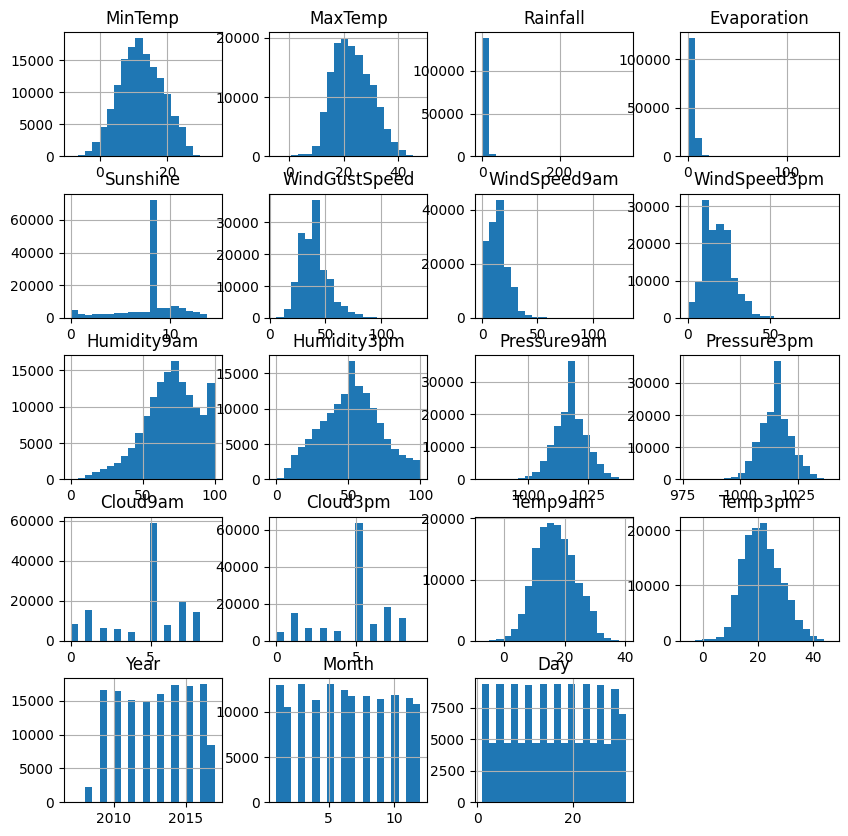

In [23]:
df.hist(bins=20,figsize=(10,10))
plt.show()

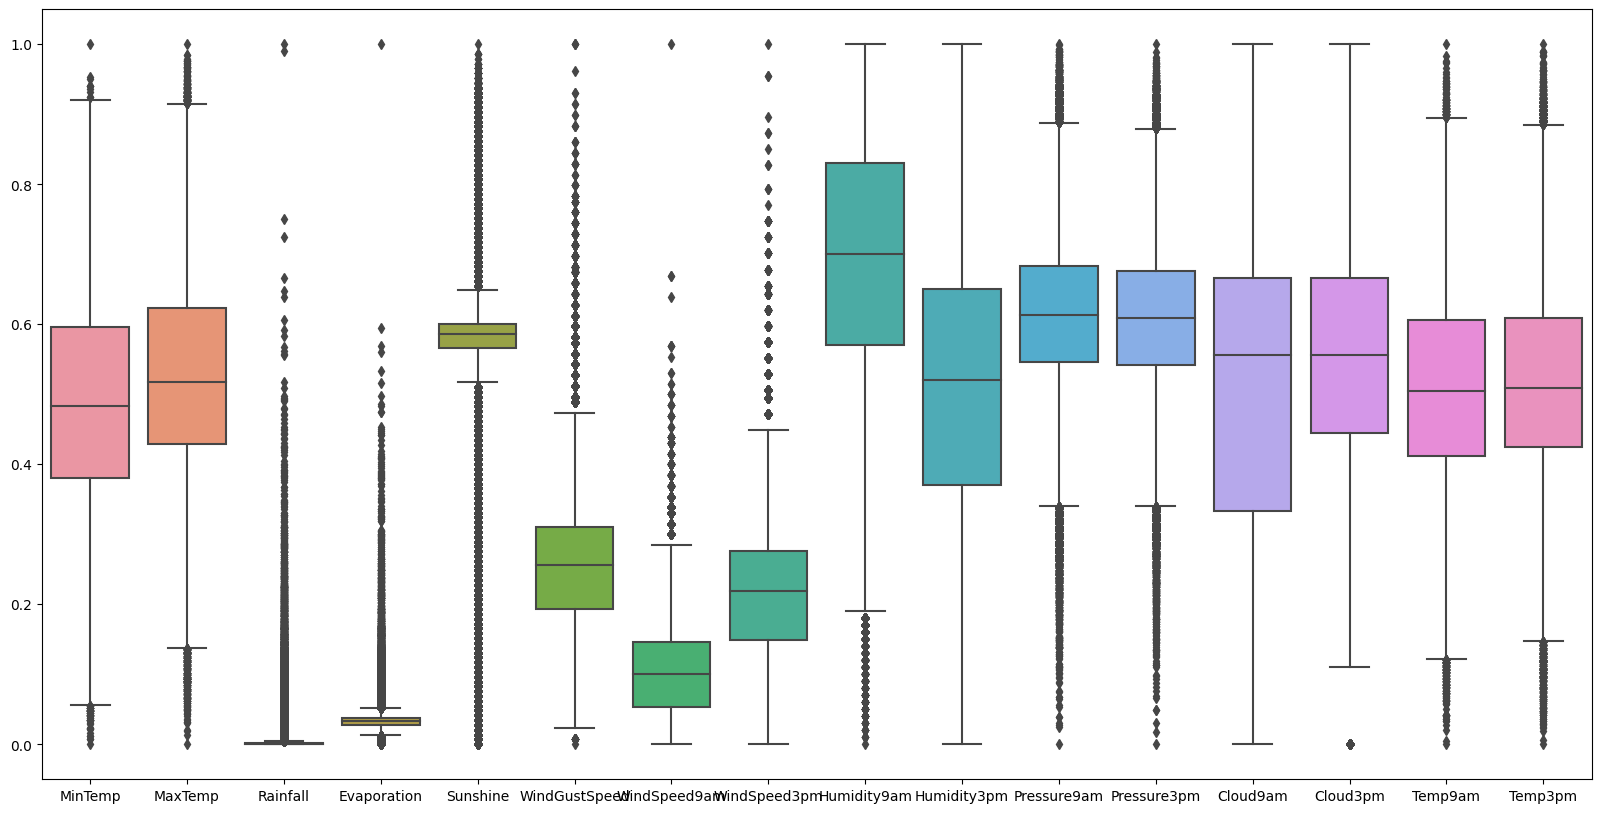

In [24]:
from sklearn.preprocessing import MinMaxScaler

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_scaled)
plt.show()

Looks like there are some serious outliers we will need to deal with to make sure it doesn't hinder our models.

I will use a top-coding approach to address this

In [25]:
rain_cap_value = df['Rainfall'].quantile(0.95)
evaporation_cap_value = df['Evaporation'].quantile(0.95)
wind9_cap_value = df['WindSpeed9am'].quantile(0.95)
wind3_cap_value = df['WindSpeed3pm'].quantile(0.95)

In [26]:
df['Rainfall'] = df['Rainfall'].apply(lambda x: x if x <= rain_cap_value else rain_cap_value)
df['Evaporation'] = df['Evaporation'].apply(lambda x: x if x <= evaporation_cap_value else evaporation_cap_value)
df['WindSpeed9am'] = df['WindSpeed9am'].apply(lambda x: x if x <= wind9_cap_value else wind9_cap_value)
df['WindSpeed3pm'] = df['WindSpeed3pm'].apply(lambda x: x if x <= wind3_cap_value else wind3_cap_value)

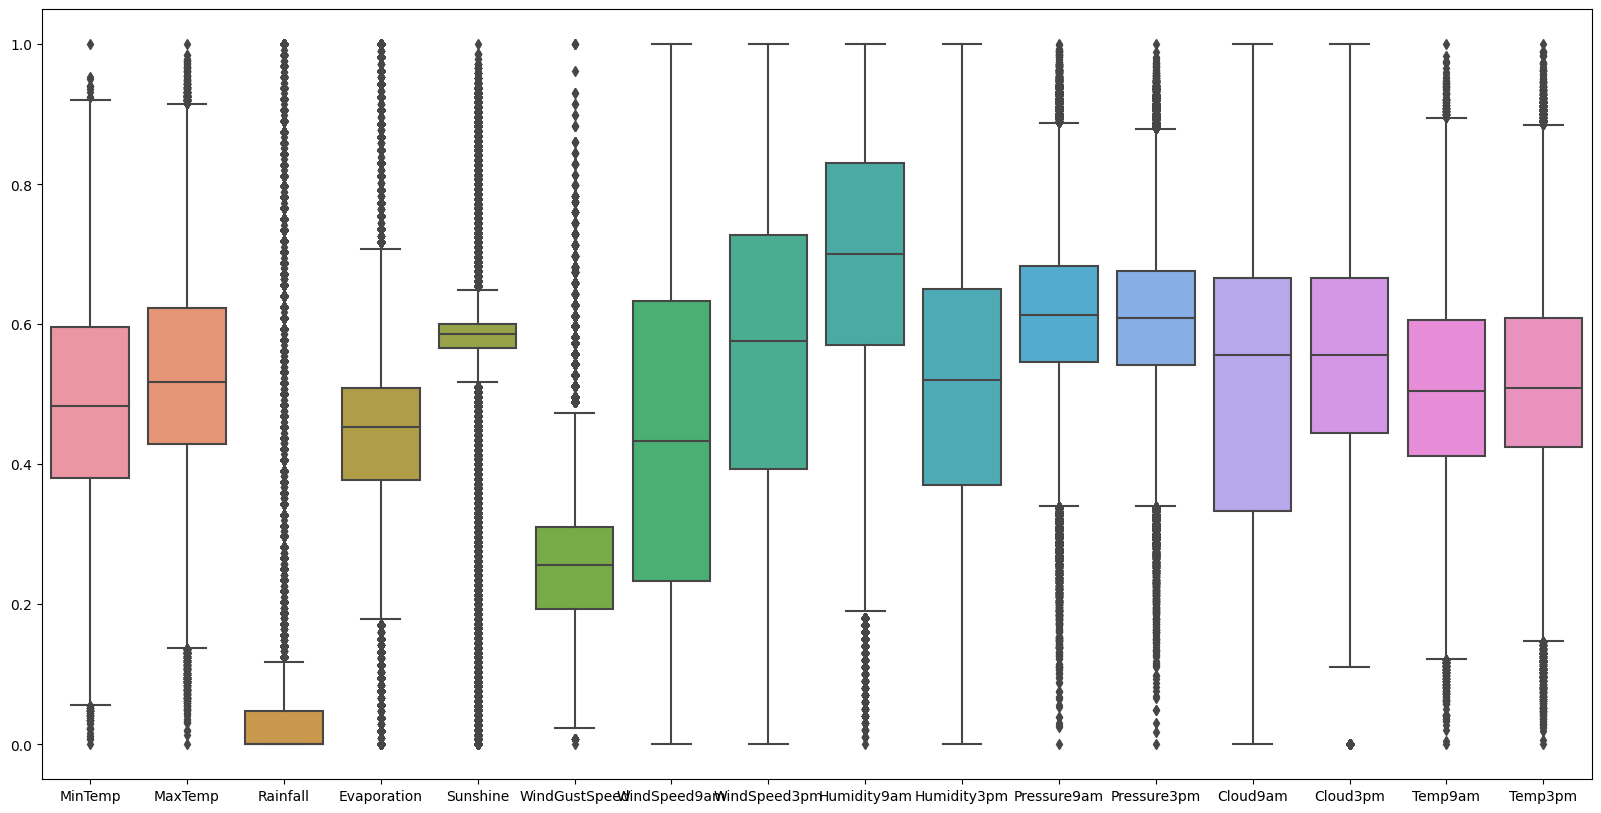

In [27]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numeric_cols]), columns=numeric_cols)

plt.figure(figsize=(20, 10))
sns.boxplot(data=df_scaled)
plt.show()

Looks better now :)

In [28]:
df.corr(numeric_only=True)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
MinTemp,1.000000,0.733894,0.086361,0.431784,0.030522,0.172719,0.183559,0.184133,-0.232714,0.006051,-0.424056,-0.433704,0.042034,-0.000871,0.898129,0.699170,0.039139,-0.203813,0.001510
MaxTemp,0.733894,1.000000,-0.170060,0.523100,0.315760,0.066930,0.022140,0.059897,-0.500179,-0.499633,-0.308861,-0.397168,-0.233831,-0.220014,0.880255,0.969297,0.058295,-0.164430,-0.000468
Rainfall,0.086361,-0.170060,1.000000,-0.124308,-0.215396,0.158943,0.097944,0.068939,0.317916,0.346305,-0.202322,-0.132828,0.222833,0.188277,-0.049959,-0.174542,-0.013747,-0.005114,0.003706
Evaporation,0.431784,0.523100,-0.124308,1.000000,0.348278,0.165582,0.162053,0.130509,-0.435321,-0.322636,-0.254882,-0.279482,-0.188368,-0.188751,0.506236,0.505763,0.046325,-0.021443,-0.007118
Sunshine,0.030522,0.315760,-0.215396,0.348278,1.000000,-0.030410,-0.005948,0.030923,-0.330731,-0.432368,0.035745,-0.010727,-0.507017,-0.527751,0.190241,0.331691,0.044734,0.017129,-0.000886
WindGustSpeed,0.172719,0.066930,0.158943,0.165582,-0.030410,1.000000,0.561498,0.636500,-0.210104,-0.027178,-0.426647,-0.384828,0.045749,0.072859,0.146615,0.032827,-0.030372,0.058779,-0.008865
WindSpeed9am,0.183559,0.022140,0.097944,0.162053,-0.005948,0.561498,1.000000,0.495703,-0.280352,-0.036993,-0.212293,-0.163618,0.001033,0.021565,0.138230,0.012568,-0.019512,0.051551,-0.009141
WindSpeed3pm,0.184133,0.059897,0.068939,0.130509,0.030923,0.636500,0.495703,1.000000,-0.149779,0.011180,-0.270831,-0.232417,0.027342,0.004295,0.174060,0.039333,-0.032225,0.057845,-0.010724
Humidity9am,-0.232714,-0.500179,0.317916,-0.435321,-0.330731,-0.210104,-0.280352,-0.149779,1.000000,0.660071,0.131517,0.176081,0.356913,0.279525,-0.471274,-0.492952,0.010595,-0.090128,0.015483
Humidity3pm,0.006051,-0.499633,0.346305,-0.322636,-0.432368,-0.027178,-0.036993,0.011180,0.660071,1.000000,-0.025913,0.048394,0.398168,0.404751,-0.217547,-0.555784,-0.008562,-0.018315,0.013030


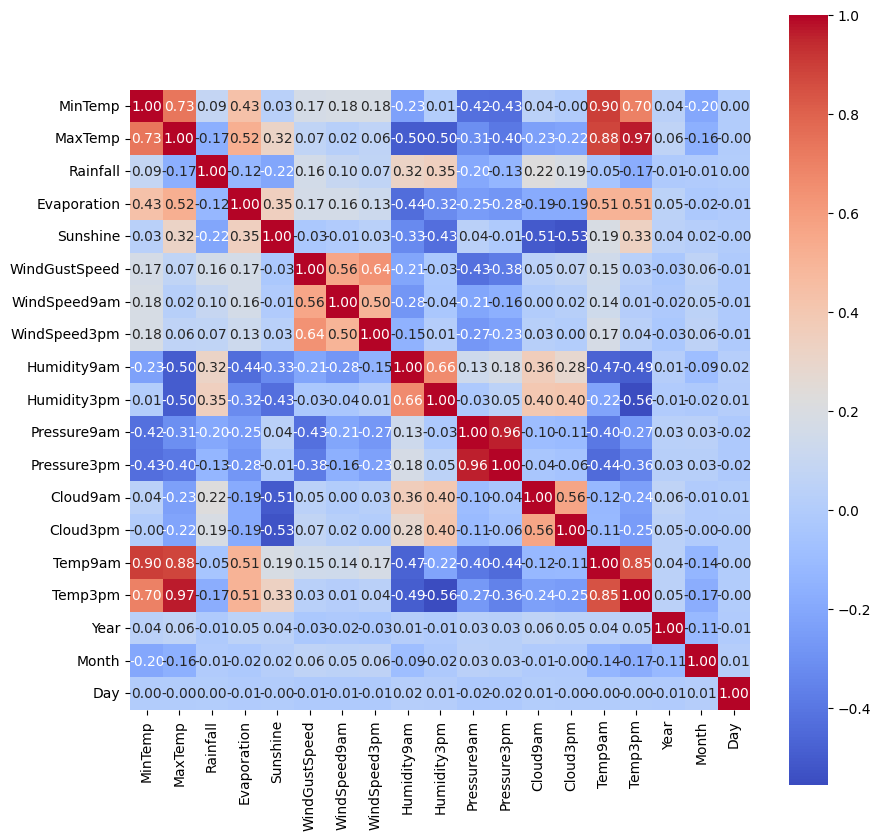

In [29]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.show()

First things that stick out to me:
- The temp columns are all very highly correlated
- Slight correlation between evaporation and temp columns
- Slight negative correlation between humidity columns and temp columns 

## Encoding categorical columns

I will now use the get_dummies function to convert my categorical data into separate numerical columns

In [30]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [31]:
#Encoding RainToday
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['RainToday'], mapping=[{
    'col': 'RainToday',
    'mapping': {'No': 0, 'Yes': 1}}])

# Fit and transform the data
df = encoder.fit_transform(df)

df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,4.8,8.5,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,4.8,8.5,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,4.8,8.5,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,4.8,8.5,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,0.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,4.8,8.5,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,No,2008,12,5


In [32]:
#Using get_dummies to the rest of the category 

# Creating dummy variables for the 'Category' column
loc_dummies = pd.get_dummies(df['Location'], prefix='Location').astype(int)
wind_gust_dummies = pd.get_dummies(df['WindGustDir'], prefix='WindGustDir').astype(int)
wind_dir9_dummies = pd.get_dummies(df['WindDir9am'], prefix='WindDir9am').astype(int)
wind_dir3_dummies = pd.get_dummies(df['WindDir3pm'], prefix='WindDir3pm').astype(int)

# Concatenating the original DataFrame with the dummy DataFrame
df = pd.concat([df, loc_dummies, wind_gust_dummies, wind_dir9_dummies, wind_dir3_dummies], axis=1)

#Drop the original categories as it's no longer needed
df = df.drop(['Location','WindGustDir','WindDir9am','WindDir3pm'], axis=1)


In [33]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,13.4,22.9,0.6,4.8,8.5,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,0,0,0,1,0
1,7.4,25.1,0.0,4.8,8.5,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,4.8,8.5,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,4.8,8.5,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,0,0,0
4,17.5,32.3,1.0,4.8,8.5,41.0,7.0,20.0,82.0,33.0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
df.dtypes.value_counts()

int32      100
float64     17
object       1
Name: count, dtype: int64

The one 'object' column is my target 'RainTomorrow' column

## Modelling

Time to standardise and split my data

In [35]:
y = df['RainTomorrow']
X = df.drop(columns=['RainTomorrow'])

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.516509,0.523629,0.046875,0.45283,0.586207,0.294574,0.666667,0.727273,0.71,0.22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.375000,0.565217,0.000000,0.45283,0.586207,0.294574,0.133333,0.666667,0.44,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.504717,0.576560,0.000000,0.45283,0.586207,0.310078,0.633333,0.787879,0.38,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.417453,0.620038,0.000000,0.45283,0.586207,0.139535,0.366667,0.272727,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.613208,0.701323,0.078125,0.45283,0.586207,0.271318,0.233333,0.606061,0.82,0.33,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.model_selection import train_test_split

## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(95269, 117) (95269,)
(46924, 117) (46924,)


## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

lr_params = {
    'penalty': ['l1','l2'],
    'C': [1, 10, 100]
}

lr = LogisticRegression(max_iter=100, solver='liblinear')


grid_search = GridSearchCV(lr, lr_params, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
lr = grid_search.best_estimator_

y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
